# 텍스트마이닝 실습(RNN)
### imdb 영화리뷰 분류

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)
top_words = 5000 #상위 단어 5000개

#학습용,검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
#                  제로 패딩 함수                 최대 사이즈
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

# create the model
embedding_vecor_length = 32 # 벡터사이즈 (단어 1개 => 32개 벡터)

model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
#                              0.0~1.0
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [5]:
import tensorflow as tf
with tf.device('/:CPU0'):
    hist=model.fit(X_train[:1000], y_train[:1000], epochs=10, batch_size=64)

Epoch 1/10


16/16 [==============================] - 8s 415ms/step - loss: 0.6932 - accuracy: 0.4870
Epoch 2/10
16/16 [==============================] - 7s 418ms/step - loss: 0.6811 - accuracy: 0.6730
Epoch 3/10
16/16 [==============================] - 7s 411ms/step - loss: 0.6357 - accuracy: 0.7690
Epoch 4/10
16/16 [==============================] - 7s 409ms/step - loss: 0.5603 - accuracy: 0.7920
Epoch 5/10
16/16 [==============================] - 7s 419ms/step - loss: 0.4087 - accuracy: 0.8730
Epoch 6/10
16/16 [==============================] - 7s 413ms/step - loss: 0.2326 - accuracy: 0.9290
Epoch 7/10
16/16 [==============================] - 7s 409ms/step - loss: 0.1121 - accuracy: 0.9730
Epoch 8/10
16/16 [==============================] - 7s 415ms/step - loss: 0.0634 - accuracy: 0.9840
Epoch 9/10
16/16 [==============================] - 7s 414ms/step - loss: 0.0235 - accuracy: 0.9960
Epoch 10/10
16/16 [==============================] - 7s 426ms/step - loss: 0.0124 - accuracy: 0.9990


In [6]:
# Final evaluation of the model
import tensorflow as tf
with tf.device('/:CPU0'):
    scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)

    print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 2s 58ms/step - loss: 0.0089 - accuracy: 0.9980
Accuracy: 99.80%


In [7]:
import tensorflow as tf
with tf.device('/:CPU0'):
    scores = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)

    print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 2s 55ms/step - loss: 0.7899 - accuracy: 0.7730
Accuracy: 77.30%


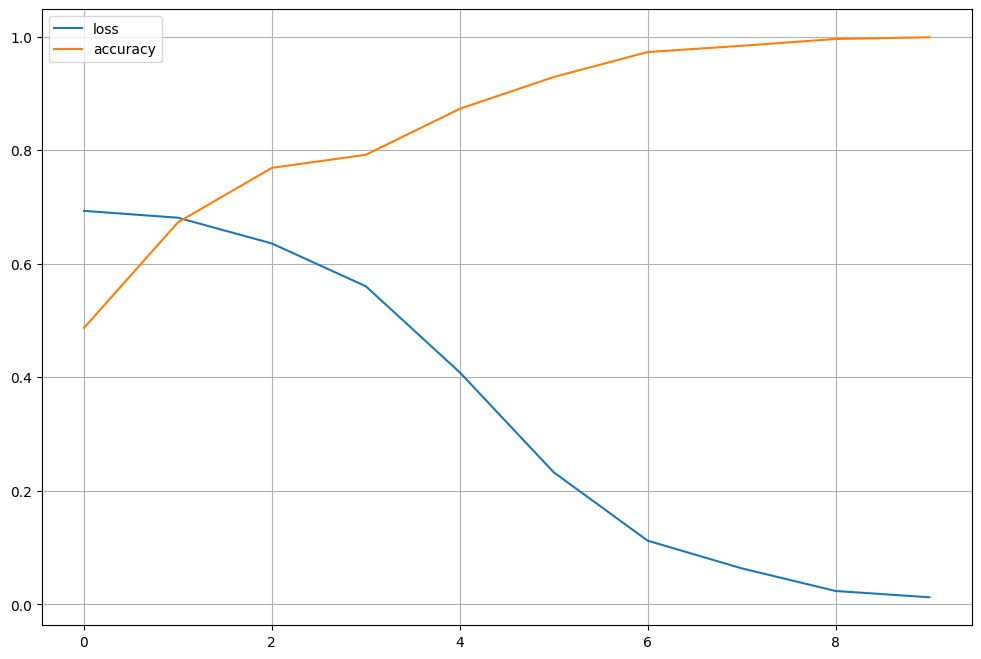

In [8]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()